In [20]:
%matplotlib inline
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Model import SugarscapeModel
from mesa.batchrunner import BatchRunner

sugarscape = SugarscapeModel()

ImportError: No module named 'seaborn'

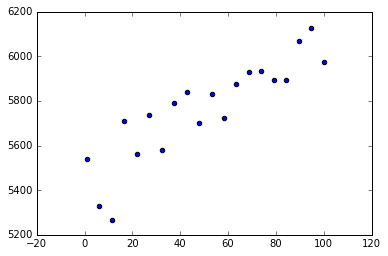

In [23]:
def get_avg_pollution(model):
    '''Data collecting method to return total wealth of a model'''
    dc = model.datacollector
    m_data = dc.get_model_vars_dataframe()
    m_data = m_data.dropna()
    return m_data.describe().Wealth.iloc[1]

model_reporters = {"Wealth": get_avg_pollution}

### Create all parameter sets

In [18]:
#This model has growth-affecting pollution and no inheritance
params_growth = {"height": 50, 
          "width": 50, 
          "init_agents": np.linspace(100,500,5), 
          "max_metabolism": 3, 
          "max_vision": 10,
          "max_init_sugar": 5, 
          "min_age": 30, 
          "max_age": 60, 
          "init_poll": np.linspace(1,10, 10),
          "ex_ratio": np.linspace(1,100, 20)}

#This model has amenity-affecting pollution and no inheritance
params_amenity = {"height": 50, 
          "width": 50, 
          "init_agents": np.linspace(100,500,5),
          "max_metabolism": 3, 
          "max_vision": 10,
          "max_init_sugar": 5, 
          "min_age": 30, 
          "max_age": 60, 
          "init_poll": np.linspace(1,10, 10),
          "ex_ratio": np.linspace(1,100, 20)}

#This model has growth_affecting pollution and inheritance
params_inh_growth = {"height": 50, 
          "width": 50, 
          "init_agents": np.linspace(100,500,5), 
          "max_metabolism": 3, 
          "max_vision": 10,
          "max_init_sugar": 5, 
          "min_age": 30, 
          "max_age": 60, 
          "init_poll": np.linspace(1,10, 10),
          "ex_ratio": np.linspace(1,100, 20)}


#This model has amenity_affecting pollution and inheritance
params_inh_amenity = {"height": 50, 
          "width": 50, 
          "init_agents": np.linspace(100,500,5), 
          "max_metabolism": 3, 
          "max_vision": 10,
          "max_init_sugar": 5, 
          "min_age": 30, 
          "max_age": 60, 
          "init_poll": np.linspace(1,10, 10),
          "ex_ratio": np.linspace(1,100, 20)}

### Create Batch Runs With Specific Rule Sets

In [19]:
sugarscape.poll_growth_rule = True
sugarscape.inheritance_rule = False
sweep_growth = BatchRunner(sugarscape, 
                          params_growth, 
                          iterations=10, 
                          max_steps=300, 
                          model_reporters=model_reporters)

sugarscape.poll_growth_rule = False
sugarscape.inheritance_rule = False
sweep_amenity = BatchRunner(SugarscapeModel,
                            params_amenity,
                            iterations=10,
                            max_steps=300,
                            model_reporters=model_reporters)

sugarscape.poll_growth_rule = True
sugarscape.inheritance_rule = True
sweep_inh_growth = BatchRunner(SugarscapeModel, 
                          params_inh_growth, 
                          iterations=10, 
                          max_steps=300, 
                          model_reporters=model_reporters)

sugarscape.poll_growth_rule = False
sugarscape.inheritance_rule = True
sweep_inh_amenity = BatchRunner(SugarscapeModel, 
                          params_inh_amenity, 
                          iterations=10, 
                          max_steps=300, 
                          model_reporters=model_reporters)

### Sweep and store all data

In [22]:
sweep_growth.run_all()
data_growth = sweep_growth.get_model_vars_dataframe()
data_growth.to_csv('Data/growth.csv')

sweep_amenity.run_all()
data_amenity = sweep_amenity.get_model_vars_dataframe()
data_amenity.to_csv('Data/amenity.csv')

sweep_inh_growth.run_all()
data_inh_growth = sweep_inh_growth.get_model_vars_dataframe()
data_amenity.to_csv('Data/inh_growth.csv')

sweep_inh_amenity.run_all()
data_inh_amenity = sweep_inh_amenity.get_model_vars_dataframe()
data_amenity.to_csv('Data/inh_amenity.csv')